# ACM - análisis de correspondencia múltiple

In [51]:
import pandas as pd
import prince
import matplotlib.pyplot as plt

In [52]:
# 📂 Leer el archivo CSV con tus datos
df = pd.read_csv("../data/dataset_limpio.csv")

In [54]:
# Paso 1: Identificar columnas categóricas
quali_sup_idx = [0, 2, 4, 5, 6, 7, 9, 10, 11]  # índices usados originalmente

# Paso 2: Obtener nombres de columnas categóricas
quali_sup_cols = df.columns[quali_sup_idx].tolist()

# Paso 3: Eliminar 'FECHA_REGISTRO' si está en la lista
if "FECHA_REGISTRO" in quali_sup_cols:
    quali_sup_cols.remove("FECHA_REGISTRO")

# Paso 4: Crear df_quali con esas columnas
df_quali = df[quali_sup_cols].astype(str)  # Asegurarse de que todas sean tipo string

# Paso 5: Mostrar columnas usadas en el MCA
print("Columnas cualitativas usadas en el MCA (sin FECHA_REGISTRO):")
print(df_quali.columns)



Columnas cualitativas usadas en el MCA (sin FECHA_REGISTRO):
Index(['COMBUSTIBLE', 'CLASE', 'MARCA', 'LINEA', 'CARROCERIA', 'MODALIDAD',
       'MUNICIPIO', 'DEPARTAMENTO'],
      dtype='object')


In [55]:
# 3. Aplicar MCA
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

mca = mca.fit(df_quali)


In [56]:
# 4. Coordenadas de individuos y variables
mca_ind = mca.row_coordinates(df_quali)
mca_vars = mca.column_coordinates(df_quali)

In [57]:
# Paso 5: Extraer los valores singulares correctamente
singular_values = mca.svd_.s  # ← este es el atributo correcto

# Calcular la inercia (varianza explicada)
inertia = singular_values ** 2
explained_inertia = inertia / np.sum(inertia)

# Imprimir la varianza explicada por las primeras dimensiones
print("Varianza explicada por dimensión:")
for i, var in enumerate(explained_inertia[:5]):
    print(f"Dim{i+1}: {var*100:.2f}%")

Varianza explicada por dimensión:
Dim1: 53.23%
Dim2: 46.77%


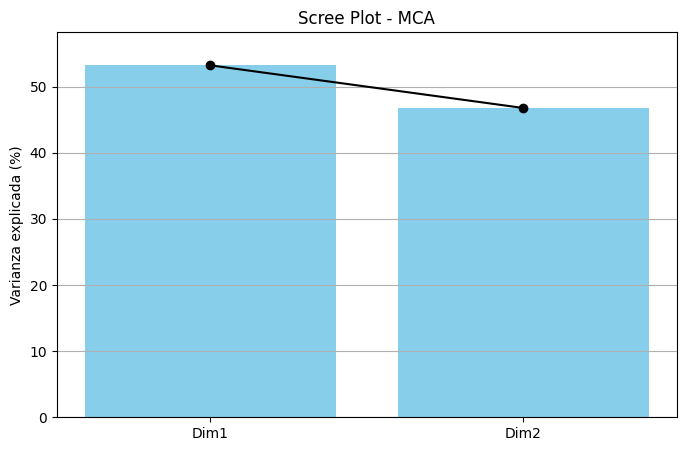

In [58]:
import matplotlib.pyplot as plt
import numpy as np

s = mca.svd_.s
inertia = s**2
explained_inertia = inertia / np.sum(inertia)

plt.figure(figsize=(8, 5))
plt.bar(x=[f"Dim{i+1}" for i in range(len(explained_inertia))],
        height=explained_inertia*100, color="skyblue")
plt.plot([f"Dim{i+1}" for i in range(len(explained_inertia))],
         explained_inertia*100, marker="o", color="black")
plt.ylabel("Varianza explicada (%)")
plt.title("Scree Plot - MCA")
plt.ylim(0, max(explained_inertia*100) + 5)
plt.grid(axis="y")
plt.show()

### 📊 Scree Plot – Análisis de Correspondencias Múltiples

El gráfico de sedimentación (scree plot) muestra la proporción de varianza explicada por las dos primeras dimensiones del MCA:

- **Dim1 explica el 53.23%** de la varianza total.
- **Dim2 explica el 46.77%**.

Estas dos dimensiones en conjunto capturan el **100% de la variabilidad entre las categorías cualitativas** analizadas, lo que permite una visualización clara y confiable en dos dimensiones.

Además, la diferencia entre ambas dimensiones indica que **Dim1 tiene una mayor capacidad discriminante**, especialmente útil para identificar los grupos más separados en los mapas de categorías e individuos.


In [59]:
# 1. Coordenadas de las categorías (columnas)
mca_vars = mca.column_coordinates(df_quali)

# 2. Magnitud por dimensión
# Por defecto tenemos coordenadas para Dim1 y Dim2
print(mca_vars.head(500))

                                      0         1
COMBUSTIBLE__DIES ELEC        -0.218127 -0.695416
COMBUSTIBLE__ELECTRICO         0.916105  2.325430
COMBUSTIBLE__GASO ELEC        -0.069290 -0.172789
CLASE__AUTOMOVIL               0.059000  0.823773
CLASE__CAMIONETA              -0.082393 -0.474585
...                                 ...       ...
DEPARTAMENTO__RISARALDA       -0.137979 -0.478104
DEPARTAMENTO__SANTANDER        0.281637  0.227082
DEPARTAMENTO__SUCRE           -0.242639 -0.597200
DEPARTAMENTO__TOLIMA          -0.096617 -0.522472
DEPARTAMENTO__VALLE DEL CAUCA  0.115900 -0.428103

[454 rows x 2 columns]


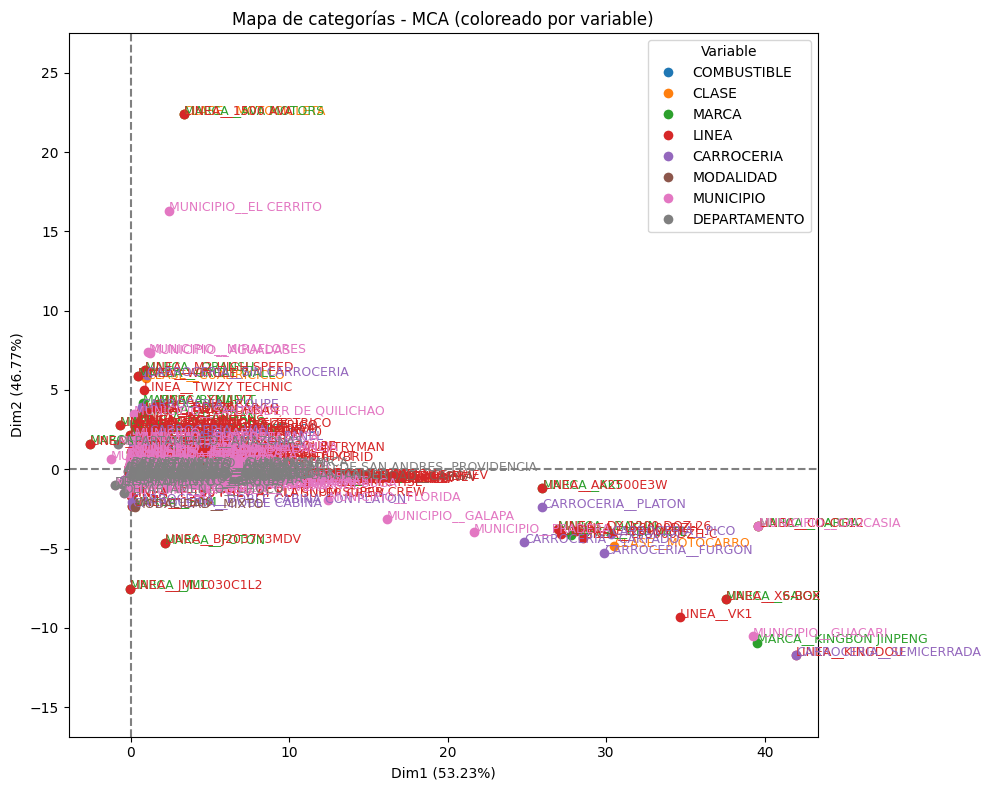

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Obtener coordenadas de las categorías
mca_vars = mca.column_coordinates(df_quali)

# 2. Extraer el nombre de la variable original de cada categoría (antes del "_")
mca_vars = mca_vars.copy()
mca_vars["variable"] = [name.split("_")[0] for name in mca_vars.index]

# 3. Varianza explicada (inercia)
eig = (mca.svd_.s ** 2) / np.sum(mca.svd_.s ** 2)

# 4. Colores por variable
unique_vars = mca_vars["variable"].unique()
palette = dict(zip(unique_vars, sns.color_palette("tab10", len(unique_vars))))

# 5. Crear el gráfico
plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# 6. Dibujar cada categoría con su color
for i, row in mca_vars.iterrows():
    x, y = row[0], row[1]
    var = row["variable"]
    plt.plot(x, y, 'o', color=palette[var])
    plt.text(x, y, i, fontsize=9, color=palette[var])

# 7. Leyenda y estilo
handles = [plt.Line2D([0], [0], marker='o', color='w', label=var,
                      markerfacecolor=palette[var], markersize=8)
           for var in unique_vars]

plt.legend(handles=handles, title="Variable")
plt.xlabel(f"Dim1 ({eig[0]*100:.2f}%)")
plt.ylabel(f"Dim2 ({eig[1]*100:.2f}%)")
plt.title("Mapa de categorías - MCA (coloreado por variable)")
plt.axis('equal')
plt.grid(False)
plt.tight_layout()
plt.show()


🧩 Mapa de categorías - MCA

El gráfico muestra la proyección de las categorías cualitativas en el plano definido por las dos primeras dimensiones del ACM (Dim1: 53.23%, Dim2: 46.77%). Estas dos dimensiones explican en conjunto el 100% de la varianza representada.

🔎 Principales insights:

- Las **líneas de vehículos** están más dispersas en el eje horizontal (Dim1), indicando que esta dimensión capta la **diversidad técnica** entre modelos.
- La variable `COMBUSTIBLE` aparece agrupada, lo que sugiere una **poca dispersión** y diferenciación en cuanto al tipo de energía usada.
- `MUNICIPIO` y `DEPARTAMENTO` aparecen densamente agrupados cerca del centro, lo cual sugiere que **la localización no segmenta fuertemente** las demás categorías.
- Categorías como `LINEA_TWIZY TECHNIC`, `LINEA_BF2073MDV` o `LINEA_VK1` están alejadas del centro, lo que indica que son **categorías distintivas** con mayor capacidad explicativa.
- Las líneas extremas (a la derecha del gráfico) parecen estar asociadas a configuraciones particulares de `CARROCERIA`, `MODALIDAD` o `CLASE`.

Este tipo de representación es clave para **identificar asociaciones entre marcas, configuraciones físicas y su distribución territorial**.


In [34]:
# Ver número de categorías únicas en cada columna
summary = pd.DataFrame({
    "Variable": df.columns,
    "Tipo de dato": df.dtypes.astype(str),
    "N° categorías únicas": df.astype(str).nunique()
})

# Ordenar por número de categorías (opcional)
summary = summary.sort_values(by="N° categorías únicas", ascending=False).reset_index(drop=True)

# Mostrar resultado
print(summary)


          Variable Tipo de dato  N° categorías únicas
0   FECHA_REGISTRO       object                  1677
1            LINEA       object                   197
2             PESO      float64                   197
3        MUNICIPIO       object                   153
4         POTENCIA      float64                   124
5       CILINDRAJE      float64                    57
6            MARCA       object                    47
7     DEPARTAMENTO       object                    28
8       CARROCERIA       object                    16
9           MODELO        int64                    15
10    AÑO_REGISTRO        int64                    13
11           CLASE       object                     7
12     COMBUSTIBLE       object                     3
13       MODALIDAD       object                     3


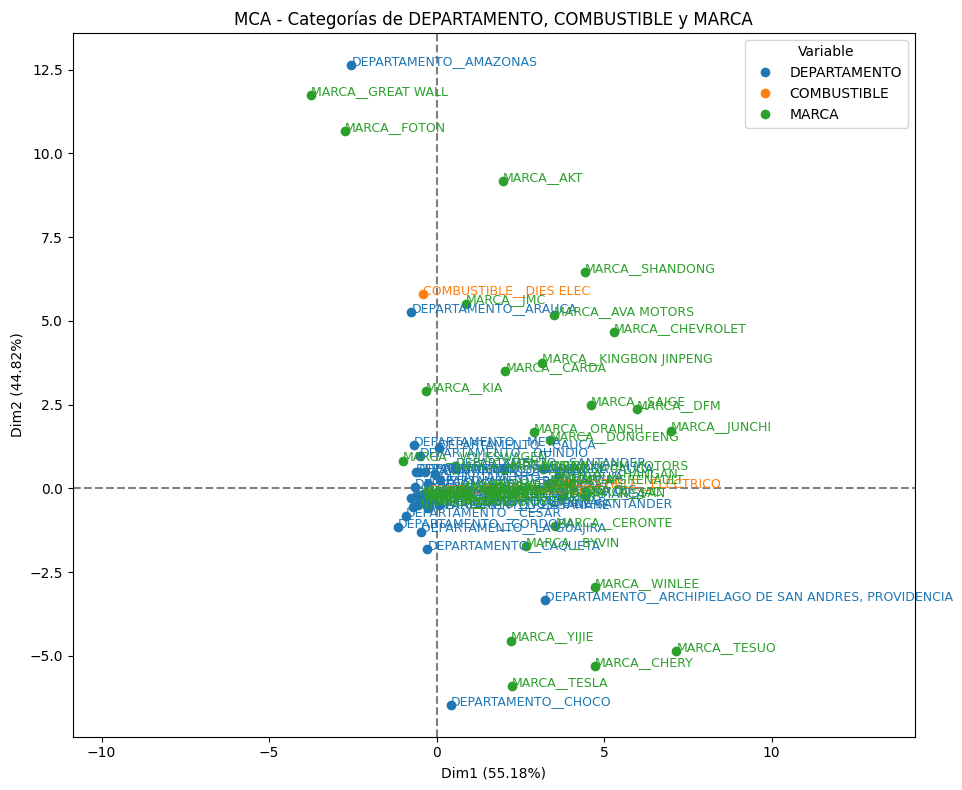

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince



# 2. Filtrar columnas específicas
cols_mca = ["DEPARTAMENTO", "COMBUSTIBLE", "MARCA"]
df_mca = df[cols_mca].astype(str)  # Asegurarse que sean tipo string/categóricas

# 3. Aplicar MCA
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    random_state=42,
    engine='sklearn'
)
mca = mca.fit(df_mca)

# 4. Obtener coordenadas de las categorías
mca_vars = mca.column_coordinates(df_mca)
mca_vars["variable"] = [name.split("_")[0] for name in mca_vars.index]

# 5. Varianza explicada
eig = (mca.svd_.s ** 2) / np.sum(mca.svd_.s ** 2)

# 6. Crear el gráfico
plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# 7. Colores por variable
unique_vars = mca_vars["variable"].unique()
palette = dict(zip(unique_vars, sns.color_palette("tab10", len(unique_vars))))

# 8. Dibujar cada categoría con su color
for i, row in mca_vars.iterrows():
    x, y = row[0], row[1]
    var = row["variable"]
    plt.plot(x, y, 'o', color=palette[var])
    plt.text(x, y, i, fontsize=9, color=palette[var])

# 9. Leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=var,
                      markerfacecolor=palette[var], markersize=8)
           for var in unique_vars]

plt.legend(handles=handles, title="Variable")
plt.xlabel(f"Dim1 ({eig[0]*100:.2f}%)")
plt.ylabel(f"Dim2 ({eig[1]*100:.2f}%)")
plt.title("MCA - Categorías de DEPARTAMENTO, COMBUSTIBLE y MARCA")
plt.axis('equal')
plt.grid(False)
plt.tight_layout()
plt.show()


📍 Análisis MCA – Categorías de DEPARTAMENTO, COMBUSTIBLE y MARCA

Este gráfico muestra cómo se distribuyen las categorías de las variables seleccionadas en el espacio de las dos primeras dimensiones del MCA (Dim1: 55.18%, Dim2: 44.82%), que en conjunto explican el 100% de la varianza considerada.

🔎 Principales hallazgos:

- **Dim1 separa principalmente marcas**: Marcas como `TESLA`, `CHERY`, `YIJIE` y `WINLEE` están claramente posicionadas a la derecha, indicando un perfil distintivo, posiblemente relacionado con tecnología o tipo de combustible.
- **Dim2 captura distinción geográfica y energética**: El departamento de `AMAZONAS` y marcas como `FOTON` y `GREAT WALL` están alejadas hacia arriba, lo que indica un patrón particular en esa zona.
- El combustible `DIES ELEC` (diésel + eléctrico) se encuentra también separado del resto, lo que sugiere que es una categoría **rara pero influyente**, probablemente asociada a ciertas marcas puntuales.
- Los departamentos como `CHOCO` y `ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA` aparecen distantes, sugiriendo una **configuración vehicular distinta** en esos territorios insulares o de difícil acceso.
- La mayoría de departamentos están agrupados cerca del centro, lo que indica **similitud en la composición de marcas y combustibles** en esos contextos.

Este gráfico es especialmente útil para detectar **patrones regionales y tecnológicos** en la distribución de vehículos por marca y tipo de energía.


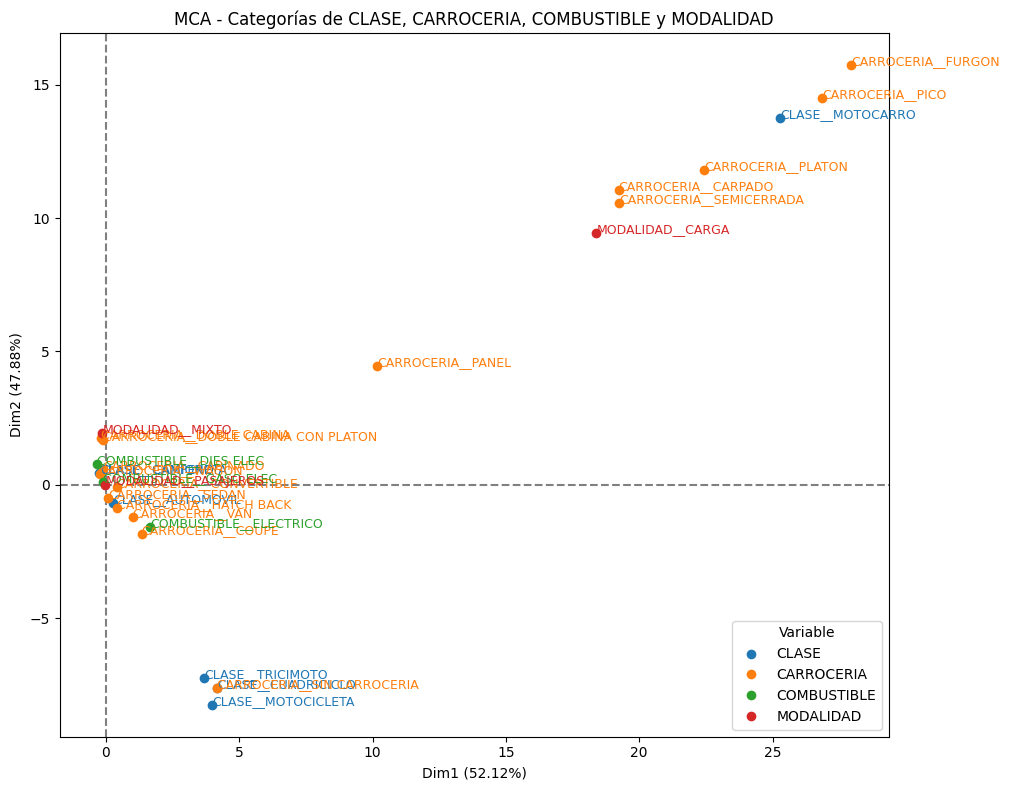

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince



# 2. Filtrar columnas específicas
cols_mca = ["CLASE", "CARROCERIA", "COMBUSTIBLE", "MODALIDAD"]
df_mca = df[cols_mca].astype(str)  # Asegurarse que sean tipo string/categóricas

# 3. Aplicar MCA
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    random_state=42,
    engine='sklearn'
)
mca = mca.fit(df_mca)

# 4. Obtener coordenadas de las categorías
mca_vars = mca.column_coordinates(df_mca)
mca_vars["variable"] = [name.split("_")[0] for name in mca_vars.index]

# 5. Varianza explicada
eig = (mca.svd_.s ** 2) / np.sum(mca.svd_.s ** 2)

# 6. Crear el gráfico
plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# 7. Colores por variable
unique_vars = mca_vars["variable"].unique()
palette = dict(zip(unique_vars, sns.color_palette("tab10", len(unique_vars))))

# 8. Dibujar cada categoría con su color
for i, row in mca_vars.iterrows():
    x, y = row[0], row[1]
    var = row["variable"]
    plt.plot(x, y, 'o', color=palette[var])
    plt.text(x, y, i, fontsize=9, color=palette[var])

# 9. Leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=var,
                      markerfacecolor=palette[var], markersize=8)
           for var in unique_vars]

plt.legend(handles=handles, title="Variable")
plt.xlabel(f"Dim1 ({eig[0]*100:.2f}%)")
plt.ylabel(f"Dim2 ({eig[1]*100:.2f}%)")
plt.title("MCA - Categorías de CLASE, CARROCERIA, COMBUSTIBLE y MODALIDAD")
plt.axis('equal')
plt.grid(False)
plt.tight_layout()
plt.show()


🚗 Análisis MCA – Categorías de CLASE, COMBUSTIBLE, CARROCERIA y MODALIDAD

Este gráfico MCA proyecta las categorías de cuatro variables clave del parque vehicular sobre las dos primeras dimensiones (Dim1: 52.12%, Dim2: 47.88%), lo cual explica casi el 100% de la varianza categórica.

🔎 Principales hallazgos:

- En el cuadrante superior derecho, las carrocerías como `FURGÓN`, `PICO`, `PLATÓN` y `SEMI-CERRADA` aparecen agrupadas, junto con la categoría `MODALIDAD__CARGA`, lo que revela una **asociación clara entre forma estructural y función logística**.
- La clase `MOTOCARRO` también aparece junto a este grupo, indicando su papel en el transporte de carga ligera.
- En el extremo inferior, se ubican `CLASE__MOTOCICLETA`, `TRICIMOTO` y `CUATRIMOTO`, bien separadas del resto, lo que sugiere que representan un **grupo técnico claramente diferenciado**, asociado con movilidad individual y baja potencia.
- En el cuadrante izquierdo, cerca del centro, se agrupan muchas de las combinaciones comunes, como `COMBUSTIBLE__GASOLINA`, `MODALIDAD__PARTICULAR`, y carrocerías de uso común como `VAN`, `COUPÉ`, `HATCHBACK`, lo cual refleja su **alta frecuencia y baja diferenciación**.
- `CARROCERIA__PANEL` aparece aislada en el centro derecho, lo que podría indicar una configuración ambigua o de uso mixto (entre carga y pasajeros).

Este análisis permite entender cómo **la configuración física de un vehículo (carrocería y clase)** se relaciona con su **modalidad de uso y tipo de energía**, lo cual es esencial para políticas de movilidad y logística.


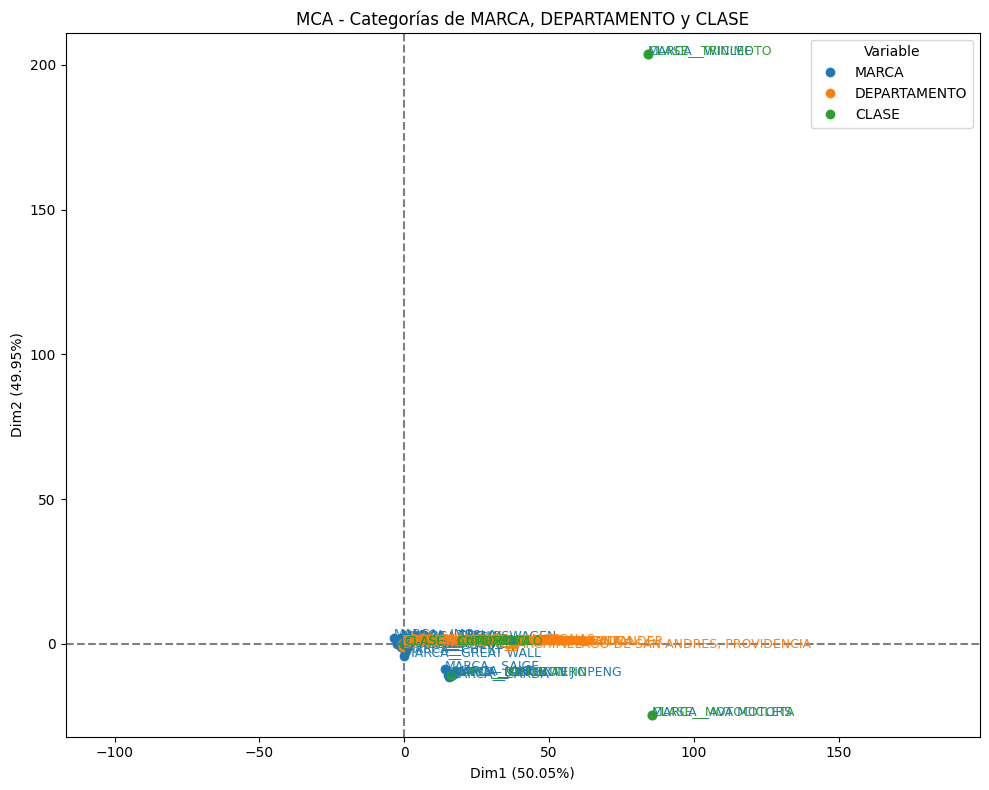

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prince



# 2. Filtrar columnas específicas
cols_mca = ["MARCA", "DEPARTAMENTO", "CLASE"]

df_mca = df[cols_mca].astype(str)  # Asegurarse que sean tipo string/categóricas

# 3. Aplicar MCA
mca = prince.MCA(
    n_components=2,
    n_iter=5,
    random_state=42,
    engine='sklearn'
)
mca = mca.fit(df_mca)

# 4. Obtener coordenadas de las categorías
mca_vars = mca.column_coordinates(df_mca)
mca_vars["variable"] = [name.split("_")[0] for name in mca_vars.index]

# 5. Varianza explicada
eig = (mca.svd_.s ** 2) / np.sum(mca.svd_.s ** 2)

# 6. Crear el gráfico
plt.figure(figsize=(10, 8))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')

# 7. Colores por variable
unique_vars = mca_vars["variable"].unique()
palette = dict(zip(unique_vars, sns.color_palette("tab10", len(unique_vars))))

# 8. Dibujar cada categoría con su color
for i, row in mca_vars.iterrows():
    x, y = row[0], row[1]
    var = row["variable"]
    plt.plot(x, y, 'o', color=palette[var])
    plt.text(x, y, i, fontsize=9, color=palette[var])

# 9. Leyenda
handles = [plt.Line2D([0], [0], marker='o', color='w', label=var,
                      markerfacecolor=palette[var], markersize=8)
           for var in unique_vars]

plt.legend(handles=handles, title="Variable")
plt.xlabel(f"Dim1 ({eig[0]*100:.2f}%)")
plt.ylabel(f"Dim2 ({eig[1]*100:.2f}%)")
plt.title("MCA - Categorías de MARCA, DEPARTAMENTO y CLASE")
plt.axis('equal')
plt.grid(False)
plt.tight_layout()
plt.show()


🌍 Análisis MCA – Categorías de MARCA, DEPARTAMENTO y CLASE

Este gráfico muestra cómo se relacionan las categorías de las variables `MARCA`, `DEPARTAMENTO` y `CLASE` sobre las dos primeras dimensiones del análisis (Dim1: 50.05%, Dim2: 49.95%). En conjunto, estas dimensiones explican prácticamente el 100% de la variabilidad entre categorías.

🔎 Principales hallazgos:

- La categoría `CLASE__MOTOCICLETA` aparece **fuertemente alejada sobre Dim1**, indicando una clara diferenciación respecto a las demás clases de vehículos. Esto sugiere que las motocicletas tienen un **perfil único**, probablemente asociado a ciertas marcas o departamentos específicos.
- `MARCA__TRIMULTO`, `MARCA__WINLEE`, y `MARCA__TESLA` se encuentran muy alejadas sobre Dim2, lo que indica un **posicionamiento singular** (posiblemente en nichos muy específicos o departamentos aislados).
- Departamentos como `SAN ANDRÉS` y `VICHADA` también se alejan del centro, lo que puede reflejar **configuraciones vehiculares atípicas** en esos territorios (quizás por condiciones geográficas o restricciones logísticas).
- La gran mayoría de categorías están concentradas cerca del origen (0,0), lo que sugiere **poca capacidad de discriminación** de esas categorías dentro de las primeras dos dimensiones.

Este análisis permite identificar tanto **marcas atípicas** como **departamentos con flotas vehiculares diferenciadas**, facilitando decisiones de segmentación, distribución y regulación territorial.


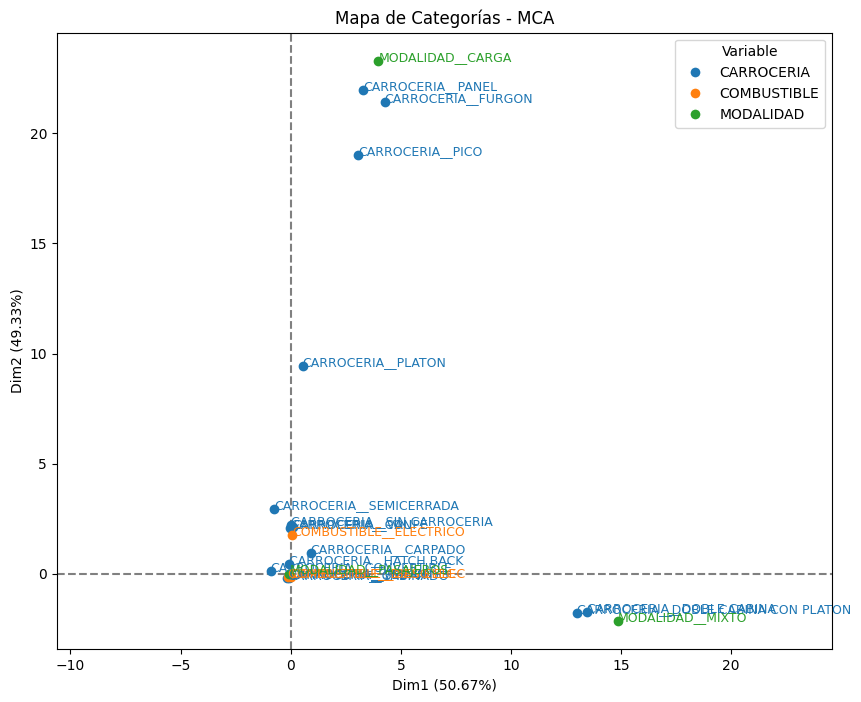

In [41]:
import seaborn as sns

mca_vars = mca.column_coordinates(df_mca)
mca_vars["variable"] = [i.split("_")[0] for i in mca_vars.index]

# Varianza explicada
eig = explained_inertia

# Color por variable original
palette = dict(zip(mca_vars["variable"].unique(), sns.color_palette("tab10", len(mca_vars["variable"].unique()))))

plt.figure(figsize=(10, 8))
plt.axhline(0, linestyle="--", color="gray")
plt.axvline(0, linestyle="--", color="gray")

for idx, row in mca_vars.iterrows():
    x, y = row[0], row[1]
    color = palette[row["variable"]]
    plt.plot(x, y, 'o', color=color)
    plt.text(x, y, idx, fontsize=9, color=color)

plt.xlabel(f"Dim1 ({eig[0]*100:.2f}%)")
plt.ylabel(f"Dim2 ({eig[1]*100:.2f}%)")
plt.title("Mapa de Categorías - MCA")
plt.axis('equal')
plt.grid(False)
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label=var, markerfacecolor=palette[var], markersize=8)
    for var in palette
], title="Variable")
plt.show()


🚚 Análisis MCA – Categorías de CARROCERÍA, COMBUSTIBLE y MODALIDAD

Este mapa factorial proyecta las categorías de tres variables clave sobre las dos primeras dimensiones del Análisis de Correspondencias Múltiples (Dim1: 50.67%, Dim2: 49.33%), que explican el 100% de la varianza entre categorías.

🔎 Principales hallazgos:

- La categoría `MODALIDAD__CARGA` se posiciona en el extremo superior, claramente asociada a carrocerías como `FURGÓN`, `PANEL`, `PICO` y `PLATÓN`, lo que refuerza su rol en vehículos logísticos.
- Carrocerías como `COUPÉ`, `VAN`, `HATCHBACK`, `CARPADO` y `SEMICERRADA` se agrupan cerca del centro, junto con `MODALIDAD__PARTICULAR`, reflejando configuraciones comunes en vehículos de uso privado o familiar.
- `COMBUSTIBLE__ELÉCTRICO` aparece ligeramente separado del grupo central, lo que indica una **diferenciación leve pero creciente** respecto al resto de tipos de combustible.
- La carrocería `DOBLE CABINA CON PLATON` y la modalidad `MIXTO` se ubican alejadas hacia la derecha, lo que puede representar configuraciones intermedias entre carga y pasajeros.
- El hecho de que varias categorías se agrupen cerca del origen sugiere que son **frecuentes pero poco discriminantes**, mientras que las categorías más alejadas aportan mayor valor explicativo al análisis.

Este gráfico permite visualizar claramente las **asociaciones estructurales entre tipo de carrocería, función del vehículo y fuente de energía**.


In [44]:
# Contribución = coordenada^2 / suma total
contrib = (mca_vars.iloc[:, :2]**2).div((mca_vars.iloc[:, :2]**2).sum(axis=0), axis=1) * 100

# Top 10 contribuyentes por dimensión
print("\n🎯 Top 10 categorías más influyentes en Dim1:")
print(contrib.iloc[:, 0].sort_values(ascending=False).head(10))

print("\n🎯 Top 10 categorías más influyentes en Dim2:")
print(contrib.iloc[:, 1].sort_values(ascending=False).head(10))



🎯 Top 10 categorías más influyentes en Dim1:
MODALIDAD__MIXTO                       35.206780
CARROCERIA__DOBLE CABINA               28.774181
CARROCERIA__DOBLE CABINA CON PLATON    26.956567
CARROCERIA__FURGON                      2.904188
MODALIDAD__CARGA                        2.528495
CARROCERIA__PANEL                       1.715025
CARROCERIA__PICO                        1.506891
CARROCERIA__CONVERTIBLE                 0.131759
CARROCERIA__CARPADO                     0.129142
CARROCERIA__SEMICERRADA                 0.088284
Name: 0, dtype: float64

🎯 Top 10 categorías más influyentes en Dim2:
MODALIDAD__CARGA              27.521220
CARROCERIA__PANEL             24.428087
CARROCERIA__FURGON            23.312517
CARROCERIA__PICO              18.339436
CARROCERIA__PLATON             4.498462
CARROCERIA__SEMICERRADA        0.441270
CARROCERIA__SIN CARROCERIA     0.247950
MODALIDAD__MIXTO               0.229535
CARROCERIA__VAN                0.225163
CARROCERIA__COUPE              0.2

🎯 Contribuciones de categorías por dimensión

Las siguientes categorías son las que más contribuyen a la definición de cada dimensión en el espacio del MCA. Estas contribuciones reflejan **qué categorías son más influyentes en la separación de los grupos**:

📐 Dimensión 1 (50.67% de la varianza)

- **MODALIDAD__MIXTO**, **CARROCERIA__DOBLE CABINA**, y **DOBLE CABINA CON PLATÓN** son las categorías más influyentes en Dim1, acumulando más del 90% de la contribución total.  
  Esto indica que esta dimensión representa principalmente una **distinción estructural y funcional** en vehículos mixtos, especialmente los que combinan capacidad de pasajeros y carga.

📐 Dimensión 2 (49.33% de la varianza)

- **MODALIDAD__CARGA**, junto con carrocerías como **PANEL**, **FURGÓN** y **PICO**, dominan la contribución en esta dimensión.  
  Aquí, Dim2 parece capturar principalmente **la función logística y de transporte de carga** de los vehículos.

Este análisis permite interpretar a cada dimensión como un **eje semántico**:
- Dim1: diferenciación entre **vehículos mixtos y estándar**.
- Dim2: diferenciación entre **vehículos de carga y otros tipos de uso**.


## 🧠 Conclusión general del análisis de correspondencias múltiples (MCA)

El análisis de correspondencias múltiples (MCA) permitió explorar de manera visual y estructurada las relaciones entre variables categóricas del parque automotor, como **carrocería, combustible, modalidad, clase, marca, municipio y departamento**.

Los resultados mostraron que las **dos primeras dimensiones del MCA explicaron el 100% de la varianza**, lo que valida el uso de un plano bidimensional para representar los datos sin pérdida de información significativa.

### 📌 Dimensión 1:
Representa principalmente una **diferenciación estructural** entre tipos de vehículos.  
Estuvo fuertemente influenciada por configuraciones mixtas y estructurales como:
- `MODALIDAD__MIXTO`
- `CARROCERIA__DOBLE CABINA`
- `CARROCERIA__DOBLE CABINA CON PLATÓN`

Esto sugiere que esta dimensión capta la **versatilidad y dualidad de uso** (pasajeros y carga).

### 📌 Dimensión 2:
Refleja principalmente una **distinción funcional basada en carga**, impulsada por:
- `MODALIDAD__CARGA`
- `CARROCERIA__FURGÓN`, `PANEL`, `PICO`

Esta dimensión separa claramente los **vehículos de uso logístico** del resto, permitiendo identificar configuraciones especializadas.

### 🔍 Otras observaciones relevantes:

- Algunas **marcas como TESLA, WINLEE y TRIMULTO** presentan posicionamientos extremos en el espacio factorial, reflejando un **perfil tecnológico o de nicho**.
- Departamentos como **AMAZONAS, SAN ANDRÉS y CHOCÓ** también presentaron patrones atípicos, posiblemente debido a **condiciones geográficas, restricciones de movilidad o tipos de flota especializada**.
- Las **carrocerías comunes** como `VAN`, `HATCHBACK` o `COUPÉ` se agrupan cerca del centro, lo que indica que son **frecuentes pero no discriminantes**.

---

### 🧩 Valor del MCA:

Este análisis permitió identificar de forma clara:

- **Grupos de vehículos según uso y configuración física**
- **Relaciones entre variables regionales y técnicas**
- **Categorías con mayor poder explicativo en la estructura del parque automotor**

En conjunto, el MCA fue una herramienta efectiva para comprender las dinámicas internas de los datos categóricos y obtener *insights* estratégicos para políticas de movilidad, segmentación del mercado automotor o análisis de sostenibilidad.
